In [35]:
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
file = 'meta_Grocery_and_Gourmet_Food.jsonl'

products = []

with open(file, 'r') as fp:
    for line in fp:
        products.append(json.loads(line.strip()))

In [37]:
# Subset all of the info to only include relevant fields
relevant_fields = ['title', 'rating_number', 'features', 'description']
products = [{field:product[field] for field in relevant_fields} for product in products]

# Combine features and description and remove unusual characters such as emojis.
for product in products:
    product['combined_description'] = re.sub(r'[^a-zA-Z0-9\s]', '', ' '.join(product['description'] + product['features'])).strip()

In [38]:
# Get the number of ratings for each product
num_ratings = []

for product in products:
    num_ratings.append(product['rating_number'])
    
num_ratings = np.array(num_ratings)
sorted(num_ratings)[-2000]

8017

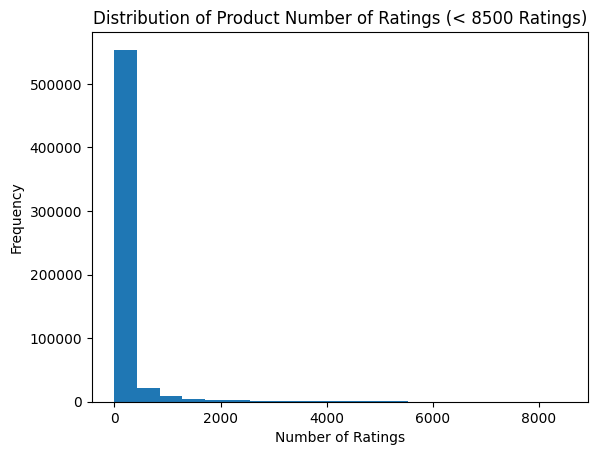

In [39]:
plt.hist(num_ratings[num_ratings<8500], bins=20)
plt.title('Distribution of Product Number of Ratings (< 8500 Ratings)')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

In [40]:
df = pd.DataFrame(num_ratings)
df.describe()


,0
count,603274.000000
mean,216.559686
std,1462.801031
min,1.000000
25%,5.000000
50%,17.000000
75%,74.000000
max,202066.000000


In [41]:
ratings_threshold = 2000 # PLEASE CHANGE THIS NUMBER
filtered_products = [product for product in products if product['rating_number'] > ratings_threshold]

print(f"There are now {len(filtered_products)} remaining products.")

There are now 11777 remaining products.


In [42]:
lengths = []
has_features = 0
has_description = 0

for product in filtered_products:
    lengths.append(len(product['combined_description']))
    if len(product['features']) > 0:
        has_features += 1
    
    if len(product['description']) > 0:
        has_description += 1
        
lengths = np.array(lengths)

In [43]:
print(f"Proportion of products with features: {has_features / len(filtered_products) * 100}")
print(f"Proportion of products with descriptions: {has_description / len(filtered_products) * 100}")

Proportion of products with features: 94.55718773881294
Proportion of products with descriptions: 77.48153179926976


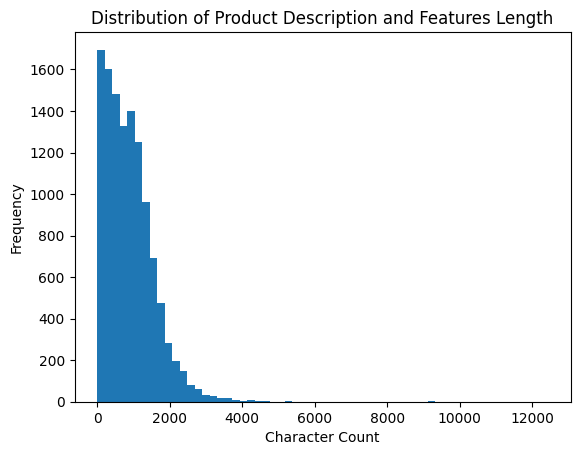

In [44]:
plt.hist(lengths, bins=60)
plt.title('Distribution of Product Description and Features Length')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

PLEASE CHOOSE YOUR OWN THRESHOLD (MINIMUM NUMBER OF CHARACTERS) BASED ON THE HISTOGRAM ABOVE. YOU MAY NEED TO CHANGE THE NUMBER OF BINS OR EXCLUDE VALUES ABOVE A CERTAIN NUMBER TO GET A SENSE FOR A GOOD CUTOFF VALUE.

In [45]:
description_threshold = 400 # PLEASE CHANGE THIS NUMBER
 
final_products = [product for product in filtered_products if len(product['combined_description']) > description_threshold]

print(f"There are now {len(final_products)} remaining products.")

There are now 8600 remaining products.


In [48]:
groceries_cleaned = pd.DataFrame(final_products)
groceries_cleaned = groceries_cleaned[['title', 'combined_description']]
groceries_cleaned.to_csv("groceries_cleaned.csv")
